## Convolutional Neural Network dan foydalanilgan holda model o'qitish

#### CIFAR-10 datasetini train va test datalarga ajratilgan holatda yuklab olamiz

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#### Train datasetidagi bir nechta rasmlarni visual ko'rinishda chiqaramiz

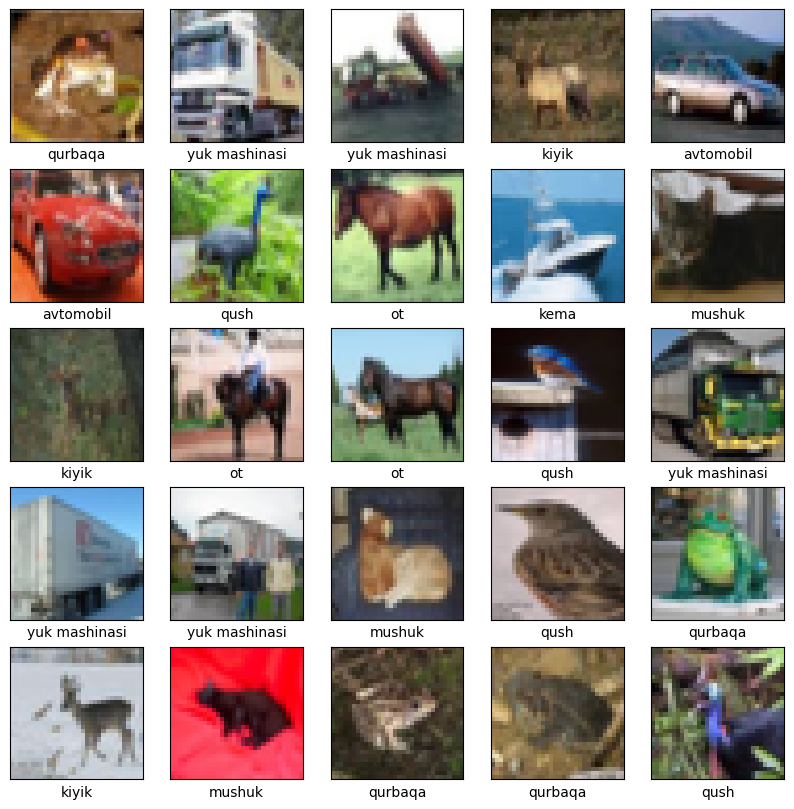

In [2]:
import matplotlib.pyplot as plt

class_names = ["samolyot","avtomobil","qush","mushuk","kiyik","it","qurbaqa","ot","kema","yuk mashinasi"]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

#### Train va Test data larning shape larini  tekshiramiz

In [3]:
print(f"x train shape:{x_train.shape}")
print(f"y train shape:{y_train.shape}")
print(f"x test shape:{x_test.shape}")
print(f"y test shape:{y_test.shape}")

x train shape:(50000, 32, 32, 3)
y train shape:(50000, 1)
x test shape:(10000, 32, 32, 3)
y test shape:(10000, 1)


#### One hot encoder funksiyasini yozib olamiz

In [4]:
import numpy as np

def one_hot_encoder(class_number,label_size):
    label = np.zeros(label_size)
    label[class_number] = 1
    return label

#### Train va Test uchun input data larni normallashtirib olamiz

In [5]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

#### Train va Test uchun input data larni shape larini CNN uchun moslab olamiz 

In [6]:
x_train.reshape(x_train.shape[0],32,32,3)
x_test.reshape(x_test.shape[0],32,32,3)

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

#### Train va Test uchun chiquvchi data larni label holatidan one hot encode holatiga o'tkazib olamiz

In [7]:
y_train = np.array([one_hot_encoder(class_number,10) for class_number in y_train])
y_test = np.array([one_hot_encoder(class_number,10) for class_number in y_test])

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

#### Model o'qitish uchun kerakli modullarni chaqirib olamiz

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout

#### Model arxitekturasini ishlab chiqamiz

In [10]:
model = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation=tf.keras.activations.relu, input_shape=(32,32,3)), # 30x30x16
    Conv2D(32, kernel_size=(3, 3), activation=tf.keras.activations.relu), # 28x28x32
    MaxPooling2D(pool_size=(2, 2)), # 14x14x32
    Conv2D(64, (3, 3), activation=tf.keras.activations.relu), # 14x14x64
    MaxPooling2D(pool_size=(2, 2)), # 7x7x64
    Flatten(),
    Dense(64, activation=tf.keras.activations.relu),
    Dense(32, activation=tf.keras.activations.relu),
    Dense(10, activation=tf.keras.activations.softmax)
])

#### Model qurishda foydalaniladigan weight va bias parametrlarini umumiy soni va har bir qatlamdagi sonini tekshirib olamiz

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0

#### Parametrlarni sozlash va Loss aniqlash uchun kerakli metodlarni parametr sifatida ko'rsatib qo'yamiz

In [12]:
# Shunchaki ishlatish
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.SGD(0.01), metrics=tf.keras.metrics.CategoricalAccuracy())

#### Forward hisoblash jarayoni 

In [13]:
train_test_history = model.fit(x_train, y_train,batch_size=10,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
5000/5000 [==============================] - 34s 7ms/step - loss: 1.7705 - categorical_accuracy: 0.3534 - val_loss: 1.6537 - val_categorical_accuracy: 0.4128
Epoch 2/10
5000/5000 [==============================] - 36s 7ms/step - loss: 1.3220 - categorical_accuracy: 0.5266 - val_loss: 1.1862 - val_categorical_accuracy: 0.5758
Epoch 3/10
5000/5000 [==============================] - 35s 7ms/step - loss: 1.1153 - categorical_accuracy: 0.6033 - val_loss: 1.0981 - val_categorical_accuracy: 0.6150
Epoch 4/10
5000/5000 [==============================] - 38s 8ms/step - loss: 0.9773 - categorical_accuracy: 0.6561 - val_loss: 1.0088 - val_categorical_accuracy: 0.6437
Epoch 5/10
5000/5000 [==============================] - 36s 7ms/step - loss: 0.8734 - categorical_accuracy: 0.6933 - val_loss: 0.9862 - val_categorical_accuracy: 0.6532
Epoch 6/10
5000/5000 [==============================] - 36s 7ms/step - loss: 0.7911 - categorical_accuracy: 0.7247 - val_loss: 0.9100 - val_categorical_acc

#### Test uchun datalarni sinovdan o'tkazish

In [14]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.0043 - categorical_accuracy: 0.6872


[1.0043243169784546, 0.6872000098228455]

#### Train va Test uchun loss hamda accuracy larni grafigini chiqaramiz 

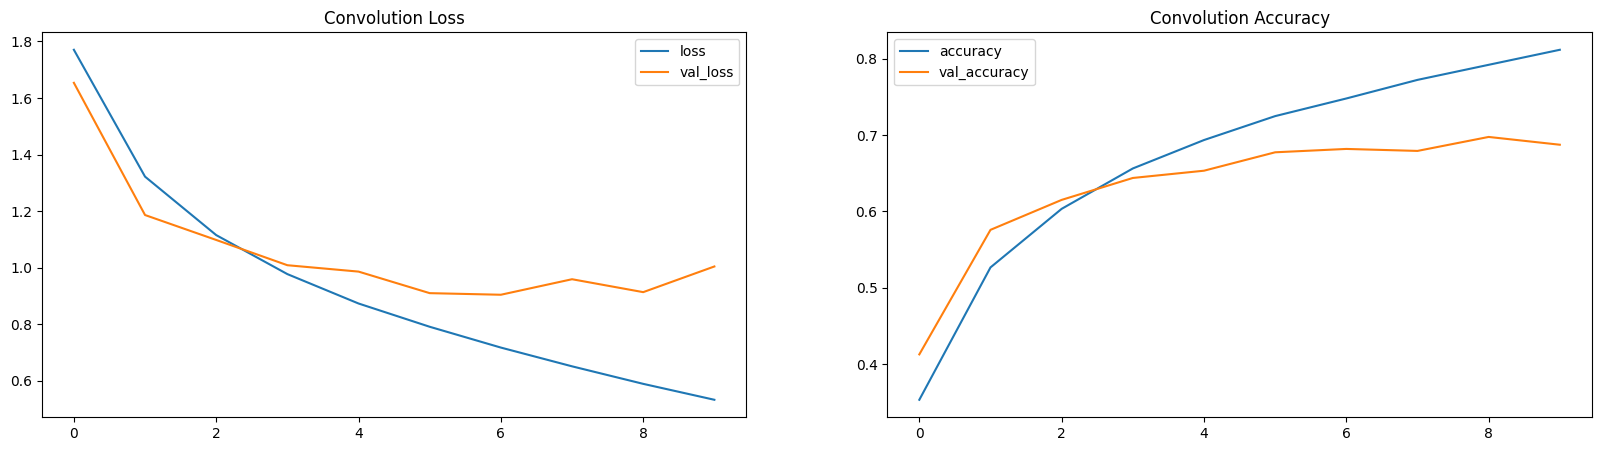

In [15]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.title("Convolution Loss")
plt.plot(train_test_history.history["loss"], label="loss")
plt.plot(train_test_history.history["val_loss"], label="val_loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Convolution Accuracy")
plt.plot(train_test_history.history["categorical_accuracy"], label="accuracy")
plt.plot(train_test_history.history["val_categorical_accuracy"], label="val_accuracy")
plt.legend()

plt.show()

#### Modelni saqlash

In [16]:
model.save('model.h5')